In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('source/pima-data.csv')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
df.shape

(768, 10)

In [4]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

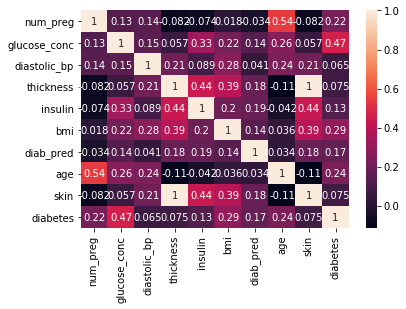

In [5]:
import seaborn as sns
cor = df.corr()
sns.heatmap(cor, annot=True)

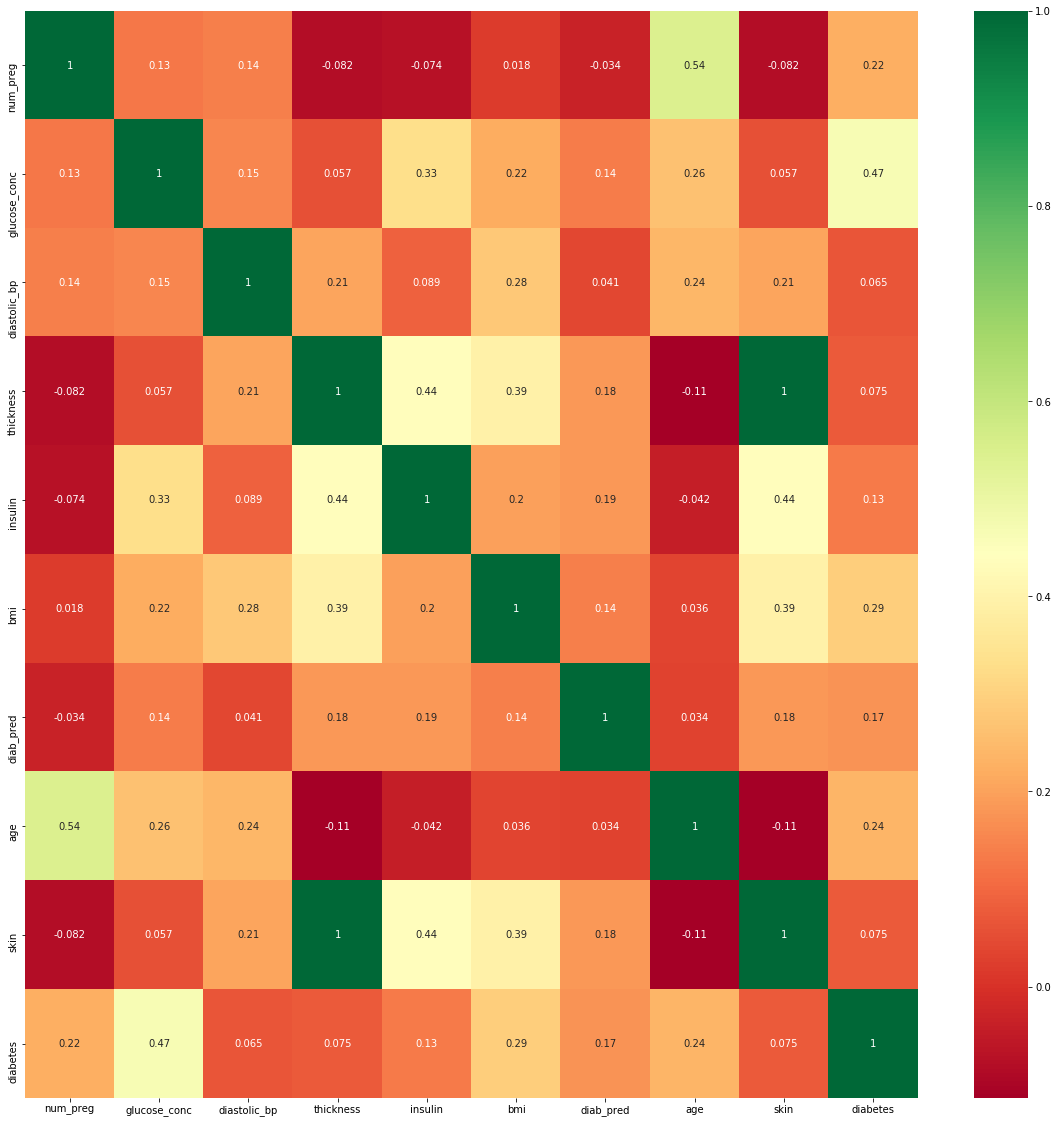

In [6]:
import seaborn as sns
cor = df.corr()
top_cor_features = cor.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_cor_features].corr(), annot=True , cmap ='RdYlGn')

In [7]:
diabetes_map = {True:1, False:0}

In [8]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [10]:
diabetes_true_count = len(df.loc[df['diabetes'] == True])
diabetes_false_count = len(df.loc[df['diabetes'] == False])

In [11]:
diabetes_true_count,diabetes_false_count

(268, 500)

In [12]:
from sklearn.model_selection import train_test_split
features_columns = ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred','age','skin']
predicted_class = ['diabetes']

In [13]:
x = df[features_columns].values
y = df[predicted_class].values

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.3, random_state=10)

In [14]:
print('Total number of rows :{0}'.format(len(df)))
print('number of rows missing num_preg : {0}'.format(len(df.loc[df['num_preg'] == 0])))
print('number of rows missing diastolic_bp : {0}'.format(len(df.loc[df['diastolic_bp'] == 0])))
print('number of rows missing insulin : {0}'.format(len(df.loc[df['insulin'] == 0])))
print('number of rows missing bmi : {0}'.format(len(df.loc[df['bmi'] == 0])))
print('number of rows missing diab_pred : {0}'.format(len(df.loc[df['diab_pred'] == 0])))
print('number of rows missing age : {0}'.format(len(df.loc[df['age'] == 0])))
print('number of rows missing skin : {0}'.format(len(df.loc[df['skin'] == 0])))
print('number of rows missing glucoss_conc : {0}'.format(len(df.loc[df['glucose_conc'] == 0])))

Total number of rows :768
number of rows missing num_preg : 111
number of rows missing diastolic_bp : 35
number of rows missing insulin : 374
number of rows missing bmi : 11
number of rows missing diab_pred : 0
number of rows missing age : 0
number of rows missing skin : 227
number of rows missing glucoss_conc : 5


In [15]:
from sklearn.preprocessing import Imputer

fill_value = Imputer(missing_values = 0, strategy = 'mean', axis=0)
x_train = fill_value.fit_transform(x_train)
#y_train = fill_value.fit_transform(y_train)
x_test = fill_value.fit_transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier(random_state=100)
r_model.fit(x_train,y_train.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [17]:
predict_train_data = r_model.predict(x_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.736


In [18]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [19]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [20]:
classifier=xgboost.XGBClassifier()

In [21]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [22]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [23]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



 Time taken: 0 hours 0 minutes and 5.04 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.7s finished


In [24]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [26]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y.ravel(),cv=10)

In [27]:
score

array([0.66233766, 0.74025974, 0.72727273, 0.67532468, 0.7012987 ,
       0.74025974, 0.76623377, 0.80519481, 0.77631579, 0.78947368])

In [28]:
score.mean()

0.7383971291866029